## Observations and Insights 

In [1]:
Three observations:
    1.Male mouse number and female mouse number are almost the same.
    2.Capomulin and Ramicane have similar effects on tumor in mice in terms of final tumor volume.
    3.For mice treated with Capomulin, the average tumor volume is related to mouse weight. 
      The higher the mouse weight, the larger the average tumor volume.


SyntaxError: invalid syntax (<ipython-input-1-233f4bc74732>, line 1)

In [4]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path,encoding="ISO-8859-1")
study_results = pd.read_csv(study_results_path,encoding="ISO-8859-1")

# Combine the data into a single dataset
combine_data=pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
combine_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
unique_data=combine_data["Mouse ID"].unique()
len(unique_data)

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_data=combine_data.groupby(["Timepoint"])
group_data.count()
indexed_data=combine_data.set_index("Sex")
duplicated_ID=indexed_data.loc[(indexed_data["Timepoint"]==0),:]

duplicated_ID.duplicated().sum()
    
combine_data.loc[combine_data.duplicated(),:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_data.loc[combine_data["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data2=combine_data.drop(combine_data[combine_data["Mouse ID"]=="g989"].index)
clean_data2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
unique_data2=clean_data2["Mouse ID"].unique()
len(unique_data2)

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#remove mouse ID with duplicate time points
clean_data=combine_data.drop(combine_data[combine_data["Mouse ID"]=="g989"].index)


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_by_drug=clean_data.groupby(["Drug Regimen"])
#group_by_drug.mean()
tumor_volume_count=group_by_drug["Tumor Volume (mm3)"].count()
tumor_volume_mean=group_by_drug["Tumor Volume (mm3)"].mean()
tumor_volume_median=group_by_drug["Tumor Volume (mm3)"].median()
tumor_volume_std=group_by_drug["Tumor Volume (mm3)"].std()

#tumor_volume_variance=tumor_volume_std**2
tumor_volume_var=tumor_volume_std**2
#tumor_volume_sem=tumor_volume_std.div(tumor_volume_count_squareroot)
tumor_volume_sem=tumor_volume_std.div(tumor_volume_count**0.5)

# Assemble the resulting series into a single summary dataframe.
df2=pd.concat([tumor_volume_mean,tumor_volume_median,tumor_volume_var,tumor_volume_std,tumor_volume_sem],axis=1)
df2.columns=["mean","median","variance","standard deviation","SEM"]
df2


,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

group_by_drug=clean_data.groupby(["Drug Regimen"])
df3=group_by_drug.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
df3.columns=["mean","median","variance","standard deviation","SEM"]
df3

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


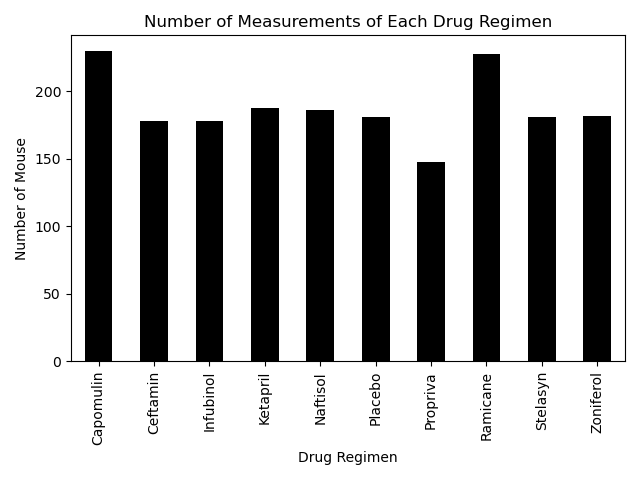

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
group_by_drug=clean_data.groupby(["Drug Regimen"])

df4=group_by_drug["Mouse ID"].count()

df4.plot(kind="bar",color="k",width=0.5,title="Number of Measurements of Each Drug Regimen")
plt.ylabel("Number of Mouse")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


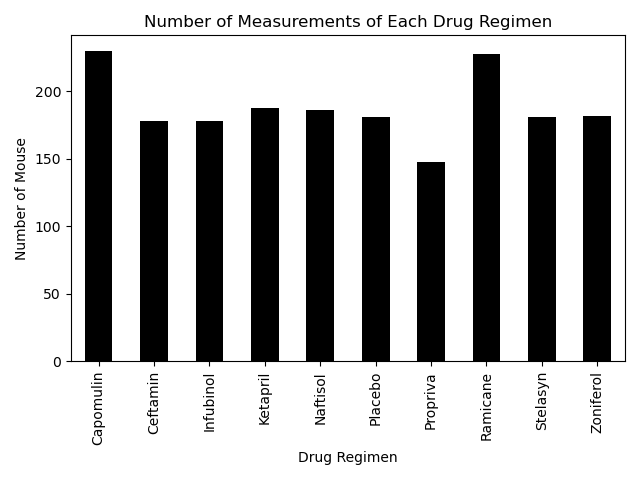

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_name=clean_data["Drug Regimen"].unique()
tumor_volume_count=group_by_drug["Drug Regimen"].count()


x=sorted(drug_name)
x_axis=np.arange(len(x))
tick_locations=[value for value in x_axis]
y=tumor_volume_count

#plt.bar(x,y)
plt.bar(x_axis,y,color="k",alpha=1,align="center",width=0.5)

#plt.xticks(tick_location,lst)
plt.xticks(tick_locations,x,rotation=90)
plt.xlim(-0.5,len(x)-0.5)
plt.title("Number of Measurements of Each Drug Regimen")
plt.ylabel("Number of Mouse")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


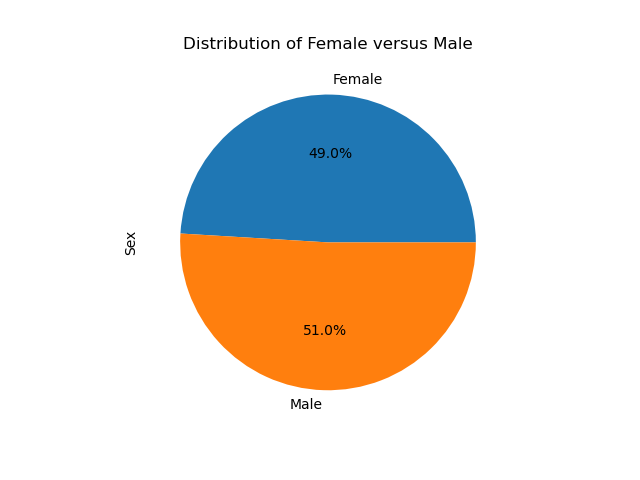

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

group_by_sex=clean_data.groupby(["Sex"])

df5=group_by_sex["Sex"].count()

df5.plot(kind="pie",title="Distribution of Female versus Male",autopct="%1.1f%%")



<IPython.core.display.Javascript object>


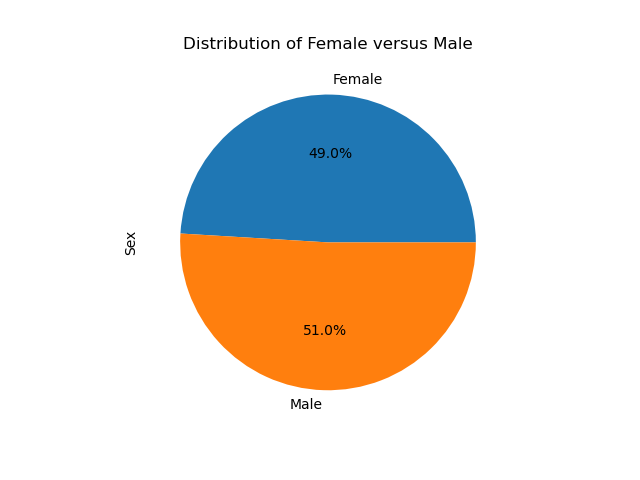

Text(0.5, 1.0, 'Distribution of Female versus Male')

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_name=clean_data["Sex"].unique()
sexname=sex_name.tolist()
labels=sorted(sexname)

sex_count=clean_data.groupby(["Sex"]).count()
size=sex_count["Mouse ID"].tolist()

colors=["blue","orange"]
explode=(0,0,0,0)
plt.pie(size,labels=labels,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Distribution of Female versus Male")


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df20=clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")|(clean_data["Drug Regimen"]=="Ramicane")|(clean_data["Drug Regimen"]=="Infubinol")|(clean_data["Drug Regimen"]=="Ceftamin"),:]

# Start by getting the last (greatest) timepoint for each mouse





#last_timepoint
df21=df20.groupby(["Mouse ID"])
df22=df21["Timepoint"].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df25=pd.merge(df22,df20,on="Timepoint",how="inner")
df26=df25.drop_duplicates()

df27=df26.sort_values("Timepoint",ascending=False)

df28=df27.drop_duplicates(["Mouse ID"])

# Put treatments into a list for for loop (and later for plot labels)

drug=["Capomulin","Ramicane","Infubinol","Ceftamin"]
x_axis=np.arange(0,len(drug))

# Create empty list to fill with tumor vol data (for plotting)

tick_locations=[]
open=[]
four_drug=[]
lower_bounds=[]
upper_bounds=[]
outliers=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for x in x_axis:
    tick_locations.append(x+1)
    one_of_drug=df28.loc[(df28["Drug Regimen"]==drug[x]),:]
    tumor_volume=one_of_drug["Tumor Volume (mm3)"]
    
    # add subset 
    four_drug.append(one_of_drug)
    open.append(tumor_volume)

    # Determine outliers using upper and lower bounds

    quartiles=open[x].quantile([.25,.5,.75])
    lowrq=quartiles[0.25]
    uperq=quartiles[0.75]
    iqr=uperq-lowrq
    lower_bound=lowrq-(1.5*iqr)
    upper_bound=uperq+(1.5*iqr)
        
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)


    outlier=four_drug[x].loc[(four_drug[x]["Tumor Volume (mm3)"]>upper_bounds[x])|(four_drug[x]["Tumor Volume (mm3)"]<lower_bounds[x]),["Tumor Volume (mm3)"]]
    outliers.append(outlier)
    
outliers



[Empty DataFrame
 Columns: [Tumor Volume (mm3)]
 Index: [],
 Empty DataFrame
 Columns: [Tumor Volume (mm3)]
 Index: [],
       Tumor Volume (mm3)
 5371           36.321346,
 Empty DataFrame
 Columns: [Tumor Volume (mm3)]
 Index: []]

<IPython.core.display.Javascript object>


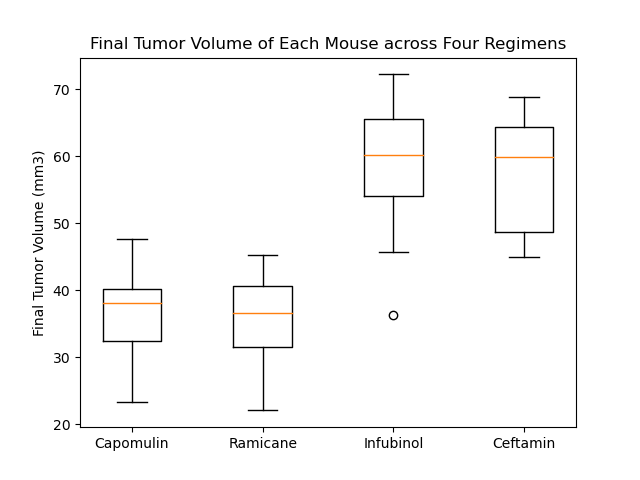

{'whiskers': [<matplotlib.lines.Line2D at 0x21645e98d30>,
 'caps': [<matplotlib.lines.Line2D at 0x21645de6f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21640d82c50>,
 'medians': [<matplotlib.lines.Line2D at 0x21645e98dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x21645e8f550>,
 'means': []}

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,(ax1)=plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticks(tick_locations)
ax1.set_xticklabels(drug)
ax1.set_title("Final Tumor Volume of Each Mouse across Four Regimens")
ax1.boxplot(open,manage_ticks=False)


## Line and Scatter Plots

<IPython.core.display.Javascript object>


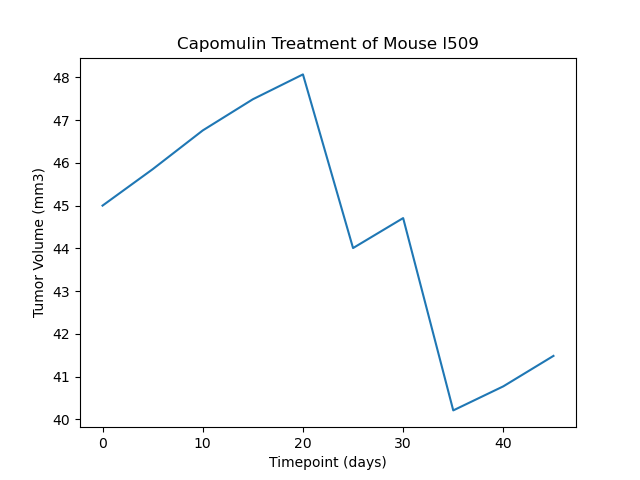

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
drug_data=clean_data[clean_data["Drug Regimen"]=="Capomulin"]
capomulin_data=drug_data.groupby(["Mouse ID"])
capomulin_data.count()
time=clean_data["Timepoint"].unique()
time_point=time.tolist()

mouse_data=clean_data.set_index(["Mouse ID"])

tumor_volume=mouse_data.loc["l509","Tumor Volume (mm3)"]
tumor_volume
tumor=tumor_volume.tolist()

plt.plot(time_point,tumor)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

<IPython.core.display.Javascript object>


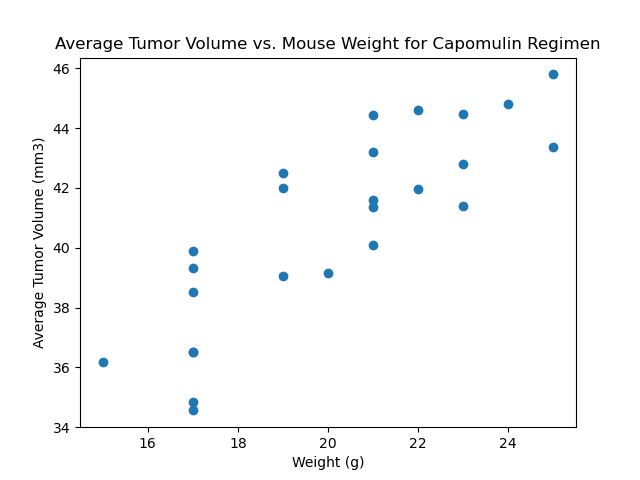

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug_data=clean_data[clean_data["Drug Regimen"]=="Capomulin"]
capomulin_data=drug_data.groupby(["Mouse ID"])
weight=capomulin_data["Weight (g)"].mean()
average_tumor_volume=capomulin_data["Tumor Volume (mm3)"].mean()
x=weight

y=average_tumor_volume

plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")

## Correlation and Regression

<IPython.core.display.Javascript object>


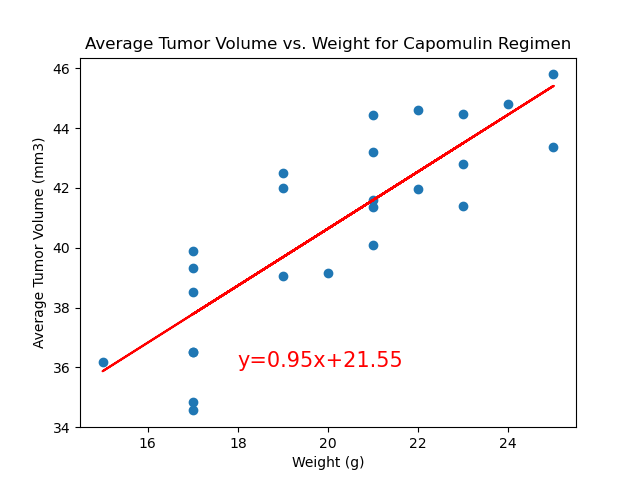

The correlation between average tumor volume and mouse weight for Capomulin Regimen is 0.84.


In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
correlation=st.pearsonr(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Capomulin Regimen")
print(f'The correlation between average tumor volume and mouse weight for Capomulin Regimen is {round(correlation[0],2)}.')
